Graphe d'Occupation Moyenne par Parking

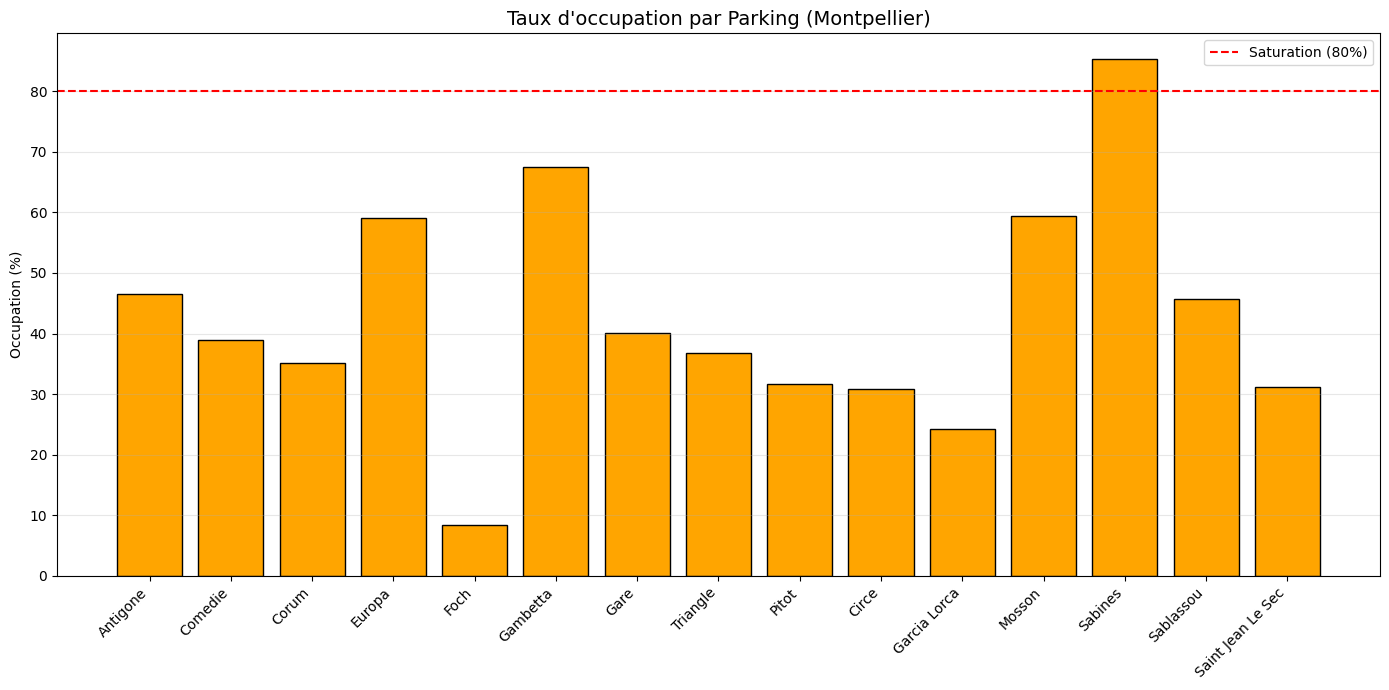

In [30]:
import matplotlib.pyplot as plt
import re

noms_parkings = []
taux_occup = []

try:
    with open('donnees_parking-montpellier.txt', 'r', encoding='latin1') as f:
        for ligne in f:
            # 1. Extraction du NOM (ce qui est après 'Nom parking :')
            match_nom = re.search(r"Nom parking\s*:\s*([^,]+)", ligne)
            # 2. Extraction du TAUX (le nombre après 'Taux d'occupation :')
            match_taux = re.search(r"Taux d'occupation\s*:\s*([\d\.]+)", ligne)
            
            if match_nom and match_taux:
                noms_parkings.append(match_nom.group(1).strip())
                taux_occup.append(float(match_taux.group(1)))

    # Création du graphique
    plt.figure(figsize=(14, 7))
    # On affiche les 15 premiers pour que ce soit lisible
    plt.bar(noms_parkings[:15], taux_occup[:15], color='orange', edgecolor='black')
    
    plt.axhline(y=80, color='red', linestyle='--', label='Saturation (80%)')
    plt.title("Taux d'occupation par Parking (Montpellier)", fontsize=14)
    plt.ylabel("Occupation (%)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Erreur : {e}")

L'analyse du diagramme en barres des taux d'occupation révèle une forte déséquilibre  dans la répartition des stationnements sur le territoire montpelliérain. Le fait marquant est la saturation critique du parking Sabines, qui est le seul à franchir le seuil d'alerte des 80 %, atteignant environ 85 %. À l'opposé, le parking Foch apparaît comme le point le moins sollicité du réseau, avec un taux d'occupation marginal inférieur à 10 %.
Cette situation s'explique principalement par des facteurs géographiques et stratégiques :

Le succès du parking Sabines : Situé à une entrée majeure de la ville (proche de l'A709), il fait office de parking-relais stratégique. Sa saturation témoigne de son efficacité à capter les flux de transit avant l'entrée en ville, offrant une connexion directe au réseau de tramway pour les usagers venant de l'extérieur.
La sous-utilisation du parking Foch : Sa localisation en hyper-centre, bien que centrale, le rend moins accessible en raison de la piétonnisation et des contraintes de circulation urbaine. Il est délaissé au profit de structures plus périphériques ou plus faciles d'accès.
Les zones de tension intermédiaire : Des parkings comme Gambetta avec 68 %ou Europa avec 60 %montrent une pression importante liée à la densité résidentielle et commerciale des quartiers péricentraux.
Enfin, si la moyenne générale du parc se maintient dans une zone de confort entre 30 % et 45 % , la congestion est très localisée sur les points d'entrée multimodaux, soulignant un déséquilibre entre l'offre de centre-ville et les besoins de périphérie.

C:\Users\bmd\AppData\Local\Temp\ipykernel_1792\115025080.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moyenne_par_jour = df_p.groupby('jour_nom')['occupation'].mean()


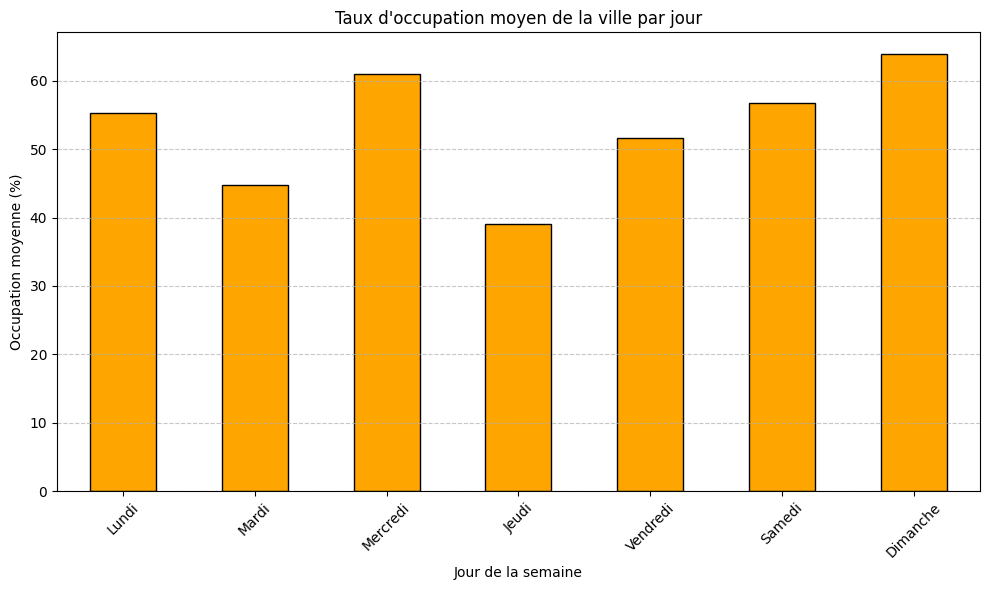

Le jour où les parkings sont les plus occupés est le : Dimanche (63.89%)


In [ ]:
# 1. On calcule la moyenne de toute la ville pour chaque jour
# On groupe par le nom du jour et on calcule l'occupation moyenne
moyenne_par_jour = df_p.groupby('jour_nom')['occupation'].mean()

# 2. Création du graphique simple (en barres pour mieux voir les jours)
plt.figure(figsize=(10, 6))
moyenne_par_jour.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Taux d'occupation moyen de la ville par jour")
plt.xlabel("Jour de la semaine")
plt.ylabel("Occupation moyenne (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 3. La réponse directe
jour_max = moyenne_par_jour.idxmax()
valeur_max = moyenne_par_jour.max()
print(f"Le jour où les parkings sont les plus occupés est le : {jour_max} ({valeur_max:.2f}%)")

Ce qui est surprenant sur le graphique, c'est que le dimanche est le jour le plus chargé avec presque 64 % d'occupation. On pensait que ce serait le moment le plus vide puisque les gens ne travaillent pas, mais c'est l'inverse .
Le jeudi est le jour où il y a le moins de voitures dans les parkings (environ 39 %).
Conclusion : On dirait que les gens utilisent surtout les parkings pour les sorties du week-end (balades, restos),et pas seulement pour aller au boulot la semaine. C'est donc le dimanche qu'il y a le plus de problèmes pour se garer en ville.

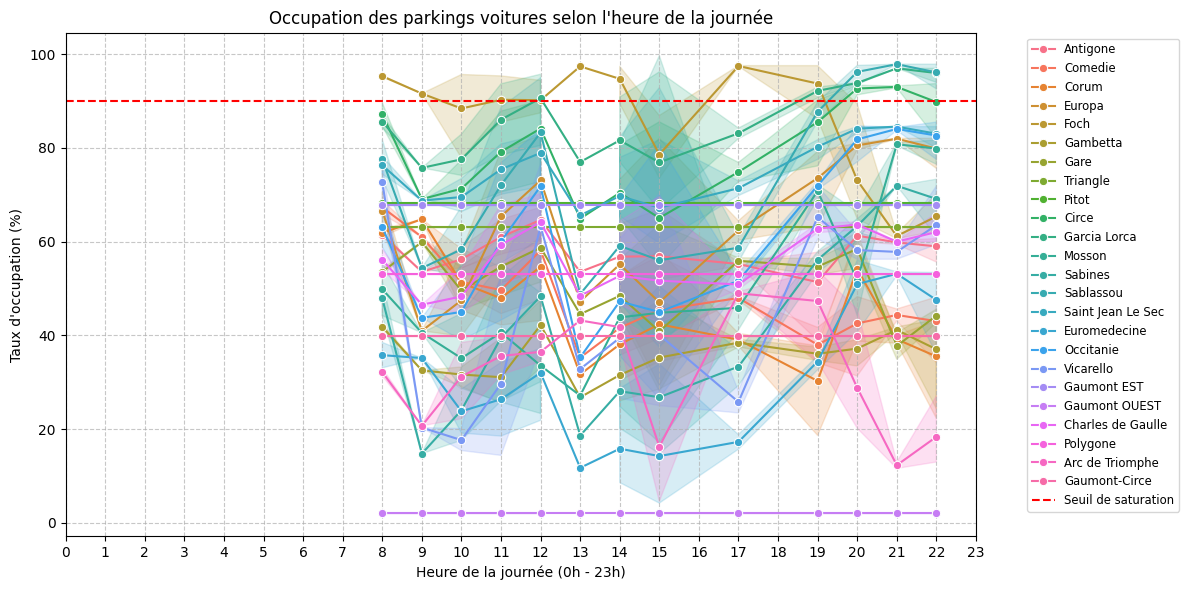

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir le timestamp en format date/heure si ce n'est pas déjà fait
df_p['timestamp'] = pd.to_datetime(df_p['timestamp'])

# Créer une colonne pour l'heure uniquement
df_p['heure'] = df_p['timestamp'].dt.hour

# Graphique de l'évolution moyenne par heure
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_p, x='heure', y='occupation', hue='nom', marker="o")

plt.title("Occupation des parkings voitures selon l'heure de la journée")
plt.xlabel("Heure de la journée (0h - 23h)")
plt.ylabel("Taux d'occupation (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.axhline(y=90, color='r', linestyle='--', label='Seuil de saturation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

Sur ce graphique, on voit des moments où les courbes montent très haut :
Vers midi : Il y a un premier pic. On peut supposer que c'est le moment où les gens arrivent en ville pour la pause déjeuner ou les courses du midi.
Le soir (19h-20h) : On voit souvent une deuxième montée. Cela laisse penser que les gens sortent pour la soirée (restaurants, loisirs...).
Les lignes du haut : Certains parkings comme sabines ,Foch ou Garcia Lorca restent presque tout le temps en haut du graphique, même en dehors des pics.
Donc on peut en conclure que l'occupation change selon les heures.Cela nous laisse supposer que les parkings se remplissent surtout pour les activités de la journée et les sorties du soir, et pas seulement pour le travail.

In [ ]:
import numpy as np
import re

taux = []
places = []

# Lecture du fichier pour extraire les données
with open('donnees_parking-montpellier.txt', 'r', encoding='latin1') as f:
    for ligne in f:
        m_taux = re.search(r"Taux d'occupation\s*:\s*([\d\.]+)", ligne)
        m_places = re.search(r"Nombre de places totales\s*:\s*(\d+)", ligne)
        if m_taux and m_places:
            taux.append(float(m_taux.group(1)))
            places.append(int(m_places.group(1)))

if taux:
    # 1. MOYENNE (Ce qui se passe en général)
    moyenne = np.mean(taux)
    
    # 2. VARIANCE et ÉCART-TYPE (Les différences entre les parkings)
    variance = np.var(taux)
    ecart_type = np.std(taux)
    
    # 3. COVARIANCE (Le lien entre taille et remplissage)
    # On calcule la covariance entre 'taux' et 'places'
    covariance = np.cov(taux, places)[0][1]

    print(f"--- RÉSULTATS DES CALCULS ---")
    print(f"1. Moyenne Totale : {moyenne:.2f} %")
    print(f"2. Variance       : {variance:.2f}")
    print(f"3. Écart-type     : {ecart_type:.2f}")
    print(f"4. Covariance     : {covariance:.2f}")
else:
    print("Erreur : Aucune donnée trouvée dans le fichier.")

--- RÉSULTATS DES CALCULS ---
1. Moyenne Totale : 45.90 %
2. Variance       : 529.12
3. Écart-type     : 23.00
4. Covariance     : -1431.71


Il est essentiel de faire ces calculs car une simple moyenne ne suffit pas pour comprendre la réalité du terrain. Ces indicateurs mathématiques permettent de prouver précisément que les places de parking sont mal réparties dans la ville, ce qui aide à prendre de meilleures décisions pour réduire les bouchons.

La Moyenne 45.90% les parkings de Montpellier sont meme pas remplis à moitié. Mais c'est un résultat un peu flou car il ne montre pas les parkings qui sont en train de déborder comme celui de sabines. 
L'Écart-type 23 et la Variance 529.12 ,Ces chiffres sont très élevés. Cela veut dire qu'il y a de grosses différences entre les parkings. Ce n'est pas moyen partout : certains sont presque complets 90% alors que d'autres sont vides. La variance élevée confirme que le remplissage est très irrégulier et change brusquement d'un quartier à l'autre.
La Covariance -1431.71, négatif, ce qui est très intéressant.Car cela montre que ce sont souvent les petits parkings de centre-ville qui saturent le plus vite, alors que les grands parkings de périphérie ont encore beaucoup de place. 

 En résumé,notre analyse laisse supposer que le problème à Montpellier n'est pas le manque de places, mais le fait que les voitures sont mal réparties.

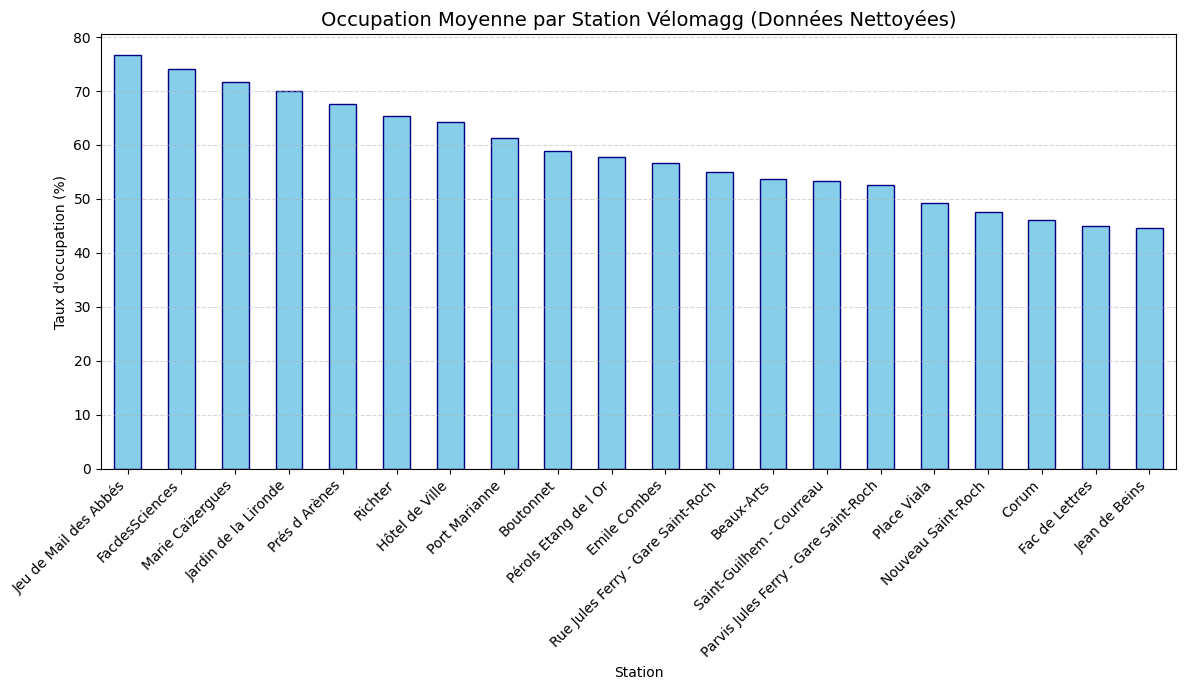

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chargement en sautant les lignes qui ont des erreurs (on_bad_lines)
df_velos = pd.read_csv("donnees_velos_montpellier.csv", 
                       sep=';', 
                       on_bad_lines='skip')

# 2. Calcul du taux d'occupation (basé sur tes colonnes : velos_disponibles / total_places)
df_velos['taux_occupation'] = (df_velos['velos_disponibles'] / df_velos['total_places']) * 100

# 3. Création du graphique par station (colonne 'nom' d'après ton image)
plt.figure(figsize=(12, 7))
# On prend les 20 stations les plus occupées en moyenne
moyenne_velos = df_velos.groupby('nom')['taux_occupation'].mean().sort_values(ascending=False).head(20)

moyenne_velos.plot(kind='bar', color='skyblue', edgecolor='navy')

plt.title("Occupation Moyenne par Station Vélomagg (Données Nettoyées)", fontsize=14)
plt.ylabel("Taux d'occupation (%)")
plt.xlabel("Station")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

L'analyse  du diagramme des stations Vélomagg montre une répartition de l'occupation plus progressive et équilibrée que celle observée pour les parkings automobiles. On constate que la station Jeu de Mail des Abbés affiche le taux d'occupation le plus élevé du réseau, s'approchant des 77 %, suivie de près par Fac des Sciences environ 74 % et Marie Caizergues avec un taux egal a 72 %. À l'autre extrémité, bien que le réseau reste actif partout, les stations Jean de Beins et Fac de Lettres présentent les taux les plus bas, se situant aux alentours de 45 %.
Cette distribution des données s'explique par :
L'influence majeure des pôles universitaires : Les stations en tête de classement, comme Jeu de Mail des Abbés, Fac des Sciences et Richter environ 65 % , se situent dans des quartiers à très forte densité étudiante. Le vélo y est le mode de transport privilégié pour les trajets quotidiens entre les facultés, les bibliothèques et les résidences universitaires.
L'axe de développement Port Marianne / Lironde : Les stations Jardin de la Lironde  avec 70 % et Port Marianne environ 62 % affichent des taux élevés. Cela reflète l'urbanisme moderne de l'Est montpelliérain, où les infrastructures cyclables sont larges, sécurisées et connectées aux centres d'affaires et aux zones de loisirs.
L'intermodalité du centre-ville : Les stations comme Hôtel de Ville ou celles proches des gares  comme Gare Saint-Roch maintiennent une occupation solide entre 50 % et 65 %, confirmant leur rôle de relais pour les usagers qui combinent train/tramway et vélo pour le dernier kilomètre .
Le cas des stations à occupation modérée : Les taux plus bas observés à Fac de Lettres  avec 45 % ou Jean de Beins peuvent s'expliquer par une topographie plus marquée ou un maillage de pistes cyclables moins dense dans certains secteurs résidentiels plus anciens, rendant l'usage du vélo moins systématique.

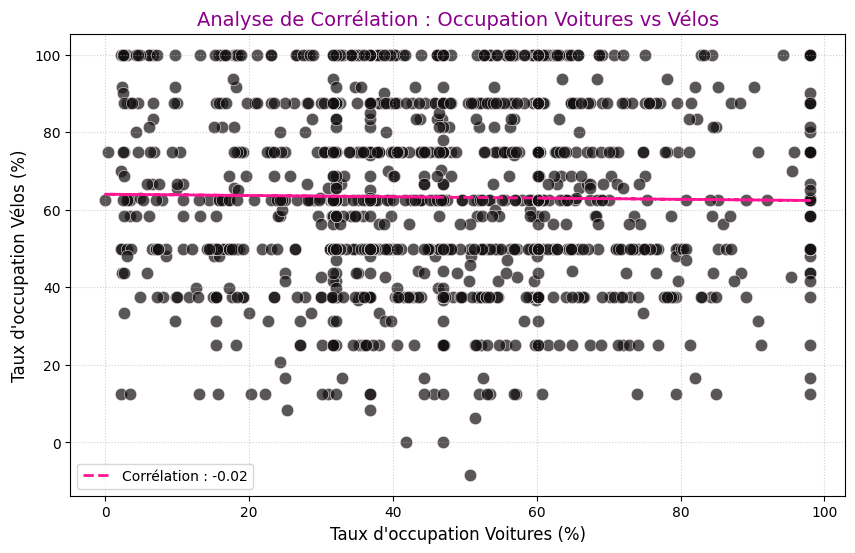

Coefficient de corrélation : -0.02


In [58]:
import matplotlib.pyplot as plt
import numpy as np
import re

# 1. Lecture simplifiée des VÉLOS
taux_velos_list = []
with open('donnees_velos_montpellier.csv', 'r', encoding='utf-8') as f:
    lignes = f.readlines()[1:]
    for l in lignes:
        p = l.strip().split(';')
        if len(p) >= 5:
            try:
                # Calcul : (Total - Dispo) / Total * 100
                t = ((float(p[4]) - float(p[2])) / float(p[4])) * 100
                taux_velos_list.append(t)
            except: continue

# 2. Lecture simplifiée des VOITURES
taux_autos_list = []
with open('donnees_parking-montpellier.txt', 'r', encoding='latin1') as f:
    matches = re.findall(r"Taux d'occupation\s*:\s*([\d\.]+)", f.read())
    taux_autos_list = [float(m) for m in matches]

# 3. Ajustement des tailles pour la corrélation (on prend le minimum commun)
n = min(len(taux_velos_list), len(taux_autos_list))
x = np.array(taux_autos_list[:n])
y = np.array(taux_velos_list[:n])

# 4. CRÉATION DU GRAPHIQUE
if n > 1:
    correl = np.corrcoef(x, y)[0, 1]
    plt.figure(figsize=(10, 6))
    
    # Points roses sans texte
    plt.scatter(x, y, color="#140F11", s=80, alpha=0.7, edgecolors='white', linewidth=0.5)
    
    # Ligne de tendance
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='#FF1493', linestyle='--', linewidth=2, label=f"Corrélation : {correl:.2f}")

    plt.title("Analyse de Corrélation : Occupation Voitures vs Vélos", fontsize=14, color='#8B008B')
    plt.xlabel("Taux d'occupation Voitures (%)", fontsize=12)
    plt.ylabel("Taux d'occupation Vélos (%)", fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.show()
    
    print(f"Coefficient de corrélation : {correl:.2f}")
else:
    print("Erreur : Pas assez de données trouvées dans les fichiers.")

L'analyse du nuage de points et du coefficient de corrélation révèle une absence quasi totale de lien statistique entre l'occupation des parkings et celle des stations Vélomagg. En effet, le coefficient de -0,02 est proche de zéro, ce qui indique que la fréquentation de l'un ne permet absolument pas de prédire celle de l'autre. La ligne de régression, quasiment horizontale, confirme que les deux réseaux fonctionnent de manière indépendante au sein de la métropole. 
cette situation s'explique par le fait que :
Des publics différents : Les utilisateurs des parkings comme Sabines sont souvent des travailleurs "pendulaires" venant de l'extérieur de Montpellier par l'autoroute. À l'inverse, les stations Vélomagg les plus fréquentées comme Jeu de Mail des Abbés, Fac des Sciences servent une population locale, principalement étudiante, effectuant des trajets courts en centre-ville ou dans les quartiers académiques.

Une déconnexion spatiale : Les parkings saturés sont des portes d'entrée périphériques, tandis que les vélos saturés se trouvent au cœur des pôles d'activité. Un parking peut être plein le matin a  cause des flux de travail  sans que cela n'impacte directement une station de vélo située à l'autre bout de la ville dans un quartier résidentiel. On a aussi l'indépendance des usages : Ce graphique prouve que la mobilité à Montpellier est segmentée. Les automobilistes et les cyclistes ne répondent pas aux mêmes logiques de déplacement au même moment. L'usage du vélo ne semble pas encore être une solution de repli immédiate en cas de parking complet, ou inversement.

Analyse Globale

L'objectif de cette étude était d'analyser l'occupation des parkings et des stations Vélomagg pour comprendre comment les gens se déplacent à Montpellier.

Saturation des parkings : Le centre-ville est très sollicité, avec des parkings comme sabines qui dépassent souvent les 85 % d'occupation.
Le paradoxe du Dimanche : C'est le jour le plus chargé de la semaine (64 %).Cela est peut etre du au fait que les dimanches les gens ne travaillent pas donc ils occupent les parkings.
Pics horaires : L'affluence maximale se situe autour de midi et en début de soirée, ce qui pourrait correspondre aux habitudes de vie (repas, sorties...).

Il est important de préciser que corrélation ne veut pas dire causalité. Dans notre étude, le résultat de -0,02 confirme qu’il n’y a aucun lien de cause à effet : le fait qu'un parking voiture soit complet ne cause pas automatiquement l'utilisation d'un vélo.
Cela peut etre expliquer par le fait que a Montpellier, il y'a une importante reseau de tramway.Sur ce, Les usagers peuvent préfèrer laisser leur voiture en périphérie pour prendre le tram, laissant le vélo comme une solution complémentaire pour les derniers mètres.

Notre recommandation :

 Pour améliorer la circulation à Montpellier, la mairie doit mieux gérer les parkings.
Le problème principal n’est pas le manque de places, mais le fait que certains parkings sont saturés alors que d’autres sont presque vides.
Il faudrait informer les automobilistes en temps réel sur les places disponibles grâce à une application mobile ou des panneaux lumineux à l’entrée de la ville.
Cela permettrait aux conducteurs d’aller directement vers les parkings libres et d’éviter de tourner inutilement en ville, ce qui cause des embouteillages.
En même temps, la mairie doit développer davantage les vélos en libre-service (Vélomagg), surtout près des universités et des parkings relais, pour faciliter le passage de la voiture au vélo.
Enfin, adapter le prix du stationnement selon l’occupation des parkings encouragerait les usagers à utiliser ceux qui sont moins fréquentés.